<a href="https://colab.research.google.com/github/vishwa702/quantum-image-classifier/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import keras
from google.colab.patches import cv2_imshow


# JPEG Compression

In [ ]:

# Load the image
img = cv2.imread('input_image.jpg')

# Convert the image to YCrCb color space
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Define the desired size for the subsampled image
new_width = img.shape[0]//2  # Set to half of the original width
new_height = img.shape[1]//2  # Set to half of the original height

# Resize the image to the desired size for subsampling
subsampled_image = cv2.resize(img, (new_width, new_height))


# Perform Huffman encoding
retval, buf = cv2.imencode('.jpg', subsampled_image, [cv2.IMWRITE_JPEG_QUALITY, 10])

# Save the compressed image
with open('compressed_image.jpg', 'wb') as f:
    f.write(buf)

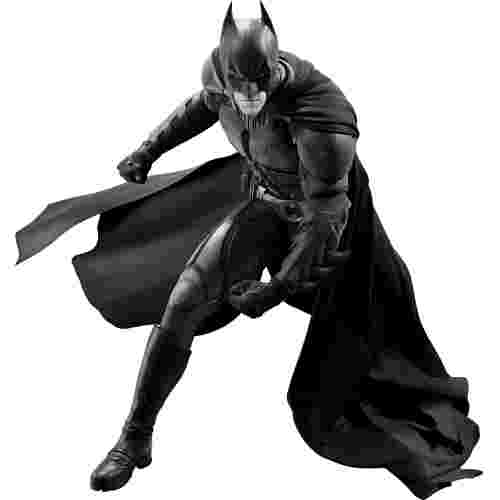

In [ ]:
compressed_img = cv2.imread('compressed_image.jpg')

# Display the image using cv2_imshow
cv2_imshow(compressed_img)

In [ ]:
!ls -alh


total 240K
drwxr-xr-x 1 root root 4.0K Oct 23 19:35 .
drwxr-xr-x 1 root root 4.0K Oct 23 17:12 ..
-rw-r--r-- 1 root root 7.0K Oct 23 19:44 compressed_image.jpg
drwxr-xr-x 4 root root 4.0K Oct 20 13:20 .config
-rw-r--r-- 1 root root 212K Oct 23 17:13 input_image.jpg
drwxr-xr-x 2 root root 4.0K Oct 23 17:14 .ipynb_checkpoints
drwxr-xr-x 1 root root 4.0K Oct 20 13:20 sample_data


In [ ]:
import numpy as np
def get_jpeg_data(img, out_length=50):
  # Load the image

  # Convert the image to YCrCb color space
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


  # Define the desired size for the subsampled image
  new_width = img.shape[0]//2  # Set to half of the original width
  new_height = img.shape[1]//2  # Set to half of the original height

  # Resize the image to the desired size for subsampling
  subsampled_image = cv2.resize(img, (new_width, new_height))

  # Perform JPEG encoding
  retval, buf = cv2.imencode('.jpg', subsampled_image, [cv2.IMWRITE_JPEG_QUALITY, 10])

  def find_matching_slice(byte_list, target_slice):
      for i in range(len(byte_list) - len(target_slice) + 1):
          if byte_list[i:i + len(target_slice)] == target_slice:
              return i
      return -1


  # Example: Create a NumPy array containing a sequence of bytes (replace this with your actual data)
  # byte_sequence = np.array([0xFF, 0xDA, 0x00, 0x11, 0x00, 0x11,  0xFF, 0xD9, 0x11, 0xD9, 0xEE], dtype=np.uint8)

  # Convert the NumPy array to a regular Python list
  # byte_list = byte_sequence.tolist()

  byte_list = buf.tolist()

  # Define the start and end sequences to search for
  start_sequence = [0xFF, 0xDA]
  end_sequence = [0xFF, 0xD9]

  # Find the starting and ending indices
  start_index = find_matching_slice(byte_list, start_sequence)
  end_index = find_matching_slice(byte_list, end_sequence)

  # Extract the data between start and end sequences
  if start_index != -1 and end_index != -1:
      extracted_data = byte_list[start_index + len(start_sequence):end_index]
      # Convert the extracted data back to a NumPy array if needed
      extracted_data_np = np.array(extracted_data, dtype=np.uint8)

      # Pad to fixed size
      if extracted_data_np.shape[0] < out_length:
        pad_width = out_length - extracted_data_np.shape[0]
        extracted_data_np = np.pad(extracted_data_np, (0, pad_width), mode='constant', constant_values=0)
      if extracted_data_np.shape[0] > out_length:
         extracted_data_np = extracted_data_np[:out_length]
      # print("Extracted data:", extracted_data_np)
      # print("Data Length: ", len(extracted_data_np))
  else:
      print("Start and end sequences not found in the data.")
  return extracted_data_np

In [ ]:
get_jpeg_data(cv2.imread('input_image.jpg'))

array([  0,  12,   3,   1,   0,   2,  17,   3,  17,   0,  63,   0, 187,
        69,  20,  80,   1,  69,  20,  80,   1,  69,  20,  80,   1,  69,
        20,  80,   1,  69,  20,  80,   1,  69,  20,  80,   1,  69,  20,
        80,   1,  69,  20,  80,   1,  69,  20,  80,   1,  69], dtype=uint8)

# Compress and Prepare MNIST Dataset

In [ ]:
from keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
digits = [0, 1]
train_filter = np.isin(train_labels, digits)
train_images = train_images[train_filter]
test_filter = np.isin(test_labels, digits)
test_images = test_images[test_filter]

In [ ]:
# Convert to JPEG embedding
train_images_jpeg = np.zeros((train_images.shape[0], 50))
for i in range(len(train_images)):
    train_images_jpeg[i] = get_jpeg_data(train_images[i])

test_images_jpeg = np.zeros((test_images.shape[0], 50))
for i in range(len(test_images)):
    test_images_jpeg[i] = get_jpeg_data(test_images[i])

In [ ]:
# digits = [0, 1]
# X_train, X_test = [], []

# for digit in digits:
#   X_train.append(train_images_jpeg.values[np.where(train_labels == digit), 1:][0])
#   X_test.append(mnist_test.values[np.where(mnist_test.values[:,0] == digit), 1:][0])

array([  0.,   8.,   1.,   1.,   0.,   0.,  63.,   0., 173.,  10.,  43.,
       177.,  46., 112., 138.,  50., 104., 153.,  85.,  88., 109.,  24.,
         4.,   3., 130., 105.,  99., 145.,  21.,  10., 186.,  22.,   4.,
       231., 131., 138.,  99., 177., 118.,  44., 107.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.])

# Train a Classical model




In [ ]:
def Model1():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([

        keras.layers.Dense(30),
        keras.layers.Dense(15),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [ ]:
c_model = Model1()

c_history = c_model.fit(
    train_images_jpeg,
    train_labels[train_filter],
    validation_split=0.2,
    batch_size=16,
    epochs=30,
    verbose=2,
)

Epoch 1/30
634/634 - 2s - loss: 10.7221 - accuracy: 0.8995 - val_loss: 0.8219 - val_accuracy: 0.9668 - 2s/epoch - 4ms/step
Epoch 2/30
634/634 - 1s - loss: 0.9069 - accuracy: 0.9448 - val_loss: 0.4050 - val_accuracy: 0.9404 - 1s/epoch - 2ms/step
Epoch 3/30
634/634 - 1s - loss: 0.6452 - accuracy: 0.9410 - val_loss: 0.3716 - val_accuracy: 0.9692 - 1s/epoch - 2ms/step
Epoch 4/30
634/634 - 1s - loss: 0.4992 - accuracy: 0.9441 - val_loss: 0.2518 - val_accuracy: 0.9660 - 1s/epoch - 2ms/step
Epoch 5/30
634/634 - 1s - loss: 0.5368 - accuracy: 0.9423 - val_loss: 0.3303 - val_accuracy: 0.9570 - 1s/epoch - 2ms/step
Epoch 6/30
634/634 - 1s - loss: 0.4641 - accuracy: 0.9421 - val_loss: 0.3510 - val_accuracy: 0.9526 - 1s/epoch - 2ms/step
Epoch 7/30
634/634 - 2s - loss: 0.3662 - accuracy: 0.9425 - val_loss: 0.1957 - val_accuracy: 0.9593 - 2s/epoch - 3ms/step
Epoch 8/30
634/634 - 2s - loss: 0.3255 - accuracy: 0.9413 - val_loss: 0.5354 - val_accuracy: 0.9139 - 2s/epoch - 2ms/step
Epoch 9/30
634/634 - 1s

In [ ]:
# Evaluate the model on the test data to compute accuracy
loss, accuracy = c_model.evaluate(test_images_jpeg, test_labels[filter])

# Print the accuracy
print(f'Test accuracy: {accuracy}')

67/67 [==============================] - 0s 2ms/step - loss: 0.1717 - accuracy: 0.9556
Test accuracy: 0.9555555582046509


# Train a Classical Model with Convolution Layer


In [ ]:
train_images.shape

(12665, 28, 28)

In [ ]:
def Model2():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Conv2D(32,(2,2),activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(12),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [ ]:
c_model2 = Model2()
train_images = train_images.reshape((12665, 28, 28, 1)).astype('float32')

c_history2 = c_model2.fit(
    train_images,
    train_labels[train_filter],
    validation_split=0.2,
    batch_size=16,
    epochs=10,
    verbose=2,
)

Epoch 1/10
634/634 - 8s - loss: 0.7428 - accuracy: 0.9939 - val_loss: 0.0157 - val_accuracy: 0.9996 - 8s/epoch - 13ms/step
Epoch 2/10
634/634 - 6s - loss: 0.0921 - accuracy: 0.9984 - val_loss: 0.0071 - val_accuracy: 0.9996 - 6s/epoch - 10ms/step
Epoch 3/10
634/634 - 8s - loss: 0.0338 - accuracy: 0.9989 - val_loss: 0.0182 - val_accuracy: 0.9992 - 8s/epoch - 13ms/step
Epoch 4/10
634/634 - 7s - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.0171 - val_accuracy: 0.9988 - 7s/epoch - 11ms/step
Epoch 5/10
634/634 - 7s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9988 - 7s/epoch - 11ms/step
Epoch 6/10
634/634 - 5s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9988 - 5s/epoch - 8ms/step
Epoch 7/10
634/634 - 6s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9988 - 6s/epoch - 10ms/step
Epoch 8/10
634/634 - 5s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9988 - 5s/epoch - 8ms/step
Ep

In [ ]:
# Evaluate the model on the test data to compute accuracy
loss, accuracy = c_model2.evaluate(test_images, test_labels[filter])

# Print the accuracy
print(f'Test accuracy: {accuracy}')

67/67 [==============================] - 0s 5ms/step - loss: 0.0398 - accuracy: 0.9986
Test accuracy: 0.99858158826828


# Train a Quantum Model